In [1]:
%matplotlib inline

In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

In [3]:
resp = pd.read_csv('sampleData/run1/1484601268080.txt', header=None)
resp.columns = ['time', 'resp', 'tone']

In [4]:
bci = pd.read_csv('sampleData/run1/OpenBCI-RAW-2017-01-16_16-12-31-oddball.txt', sep=', ', skiprows=4, header=None)
chan_columns = [str(i) for i in range(1,9)]
bci.columns = ['ticks'] + chan_columns + ['a', 'b', 'c', 'time']

/home/mike/ve/erp/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [5]:
resp.sort_values('time', inplace=True)

In [6]:
t0 = bci.loc[0, 'time'] 
# tmid_bci = bci.loc[len(bci) // 2, 'time']
# tmid_resp = resp.loc[len(resp) // 2, 'time']
# delta_t = tmid_resp-tmid_bci
# print(tmid_bci, tmid_resp, delta_t, t0)

resp['latency'] = resp['time'] - t0 
bci['latency'] = bci['time'] - t0

In [7]:
tonef = resp['tone'].replace({'C4':1, 'C5':2, 'C3': 0})
resp['tonef'] = pd.Series(tonef, dtype='float64')
# resp['tonef'].dtype

In [8]:
resp.dtypes

time         int64
resp         int64
tone        object
latency    float64
tonef      float64
dtype: object

In [9]:
resp

,time,resp,tone,latency,tonef
0,1484600966830,0,C5,-199806.0,2.0
1,1484600968330,0,C4,-198306.0,1.0
2,1484600969830,0,C4,-196806.0,1.0
3,1484600971330,0,C4,-195306.0,1.0
4,1484600972830,0,C4,-193806.0,1.0
5,1484600974330,0,C5,-192306.0,2.0
6,1484600975830,0,C4,-190806.0,1.0
7,1484600977330,0,C4,-189306.0,1.0
8,1484600978830,0,C4,-187806.0,1.0
9,1484600980330,0,C4,-186306.0,1.0


In [44]:
resp.iloc[0]

time       1484600966830
resp                   0
tone                  C5
latency          -199806
tonef                  2
Name: 0, dtype: object

In [50]:
bci['time'][0]

1484601166636

In [55]:
int(resp['time'][0]) - int(bci['time'][0])

-199806

In [10]:
len(bci)

26492

In [11]:
resp['time'] = pd.Series(resp['time'], dtype='int64') # Converting to int to allow for indexing safely
bci['time'] = pd.Series(bci['time'], dtype='int64')

In [12]:
bci

,ticks,1,2,3,4,5,6,7,8,a,b,c,time,latency
0,0,65908.52,-60502.75,18753.72,-59711.32,14425.12,-59723.81,7026.90,163415.34,0.01,-0.02,1.04,1484601166636,0.0
1,1,65885.30,-60182.50,18726.98,-59706.56,14396.18,-59617.51,6997.95,163411.45,0.00,0.00,0.00,1484601166640,4.0
2,2,65868.48,-59552.22,18706.76,-59696.95,14383.55,-59398.33,6982.93,163407.78,0.00,0.00,0.00,1484601166645,9.0
3,3,65887.27,-59397.10,18729.62,-59701.13,14406.44,-59497.21,7008.08,163401.73,0.00,0.00,0.00,1484601166649,13.0
4,4,65899.29,-59907.30,18741.24,-59714.11,14422.69,-59732.11,7026.11,163394.59,0.00,0.00,0.00,1484601166653,17.0
5,5,65880.67,-60146.84,18719.29,-59710.71,14401.36,-59654.68,7004.39,163389.61,0.00,0.00,0.00,1484601166655,19.0
6,6,65859.93,-60248.99,18698.73,-59697.75,14381.47,-59378.84,6987.02,163385.92,0.00,0.00,0.00,1484601166660,24.0
7,7,65879.38,-60861.23,18724.50,-59697.98,14402.44,-59415.70,7005.62,163379.33,0.01,-0.02,1.04,1484601166664,28.0
8,8,65904.52,-61150.82,18745.24,-59709.55,14424.14,-59689.53,7026.52,163371.67,0.00,0.00,0.00,1484601166667,31.0
9,9,65882.75,-60967.60,18720.61,-59714.96,14403.64,-59720.08,7006.42,163367.47,0.00,0.00,0.00,1484601166672,36.0


In [13]:
mid = len(bci) // 2
bci2 = bci.iloc[mid-100:mid+100]

In [14]:
# bci2.merge(resp, 'outer', on='time', sort=True)

In [15]:
# bci.merge(resp, 'outer', on='time', sort=True).to_csv('testmerge.csv')
mframe = pd.merge_asof(bci, resp, on='time', allow_exact_matches=False)

In [16]:
mframe

,ticks,1,2,3,4,5,6,7,8,a,b,c,time,latency_x,resp,tone,latency_y,tonef
0,0,65908.52,-60502.75,18753.72,-59711.32,14425.12,-59723.81,7026.90,163415.34,0.01,-0.02,1.04,1484601166636,0.0,0,C3,-177306.0,0.0
1,1,65885.30,-60182.50,18726.98,-59706.56,14396.18,-59617.51,6997.95,163411.45,0.00,0.00,0.00,1484601166640,4.0,0,C3,-177306.0,0.0
2,2,65868.48,-59552.22,18706.76,-59696.95,14383.55,-59398.33,6982.93,163407.78,0.00,0.00,0.00,1484601166645,9.0,0,C3,-177306.0,0.0
3,3,65887.27,-59397.10,18729.62,-59701.13,14406.44,-59497.21,7008.08,163401.73,0.00,0.00,0.00,1484601166649,13.0,0,C3,-177306.0,0.0
4,4,65899.29,-59907.30,18741.24,-59714.11,14422.69,-59732.11,7026.11,163394.59,0.00,0.00,0.00,1484601166653,17.0,0,C3,-177306.0,0.0
5,5,65880.67,-60146.84,18719.29,-59710.71,14401.36,-59654.68,7004.39,163389.61,0.00,0.00,0.00,1484601166655,19.0,0,C3,-177306.0,0.0
6,6,65859.93,-60248.99,18698.73,-59697.75,14381.47,-59378.84,6987.02,163385.92,0.00,0.00,0.00,1484601166660,24.0,0,C3,-177306.0,0.0
7,7,65879.38,-60861.23,18724.50,-59697.98,14402.44,-59415.70,7005.62,163379.33,0.01,-0.02,1.04,1484601166664,28.0,0,C3,-177306.0,0.0
8,8,65904.52,-61150.82,18745.24,-59709.55,14424.14,-59689.53,7026.52,163371.67,0.00,0.00,0.00,1484601166667,31.0,0,C3,-177306.0,0.0
9,9,65882.75,-60967.60,18720.61,-59714.96,14403.64,-59720.08,7006.42,163367.47,0.00,0.00,0.00,1484601166672,36.0,0,C3,-177306.0,0.0


In [17]:
mframe['dtone'] = mframe['tonef'].diff().fillna(0)
mframe['oddball'] = mframe['dtone'] == 2
mframe.drop(['a', 'b', 'c', 'dtone'], axis=1, inplace=True)

In [18]:
mframe.to_csv('testmerge.csv')
print(mframe.shape, bci.shape)

(26492, 16) (26492, 14)


In [19]:
resp['tone'].dtype

dtype('O')

In [20]:
import os
orig = os.getcwd()

In [21]:
erp_index = mframe[mframe['oddball']].index
for el in erp_index:
    print(el)

11189
11939
14191
14942
16819
17568
19444
21321
23198
24324


In [22]:
sampleRate = 250 # Hz
erpTime = 1000 # sec
erp_window = 1000 # ms

In [23]:
mframe.iloc[erp_index[0]:erp_index[0]+erp_window]

,ticks,1,2,3,4,5,6,7,8,time,latency_x,resp,tone,latency_y,tonef,oddball
11189,147,19563.77,0.0,15762.14,-14330.46,14228.32,0.0,6727.96,0.0,1484601211429,44793.0,0,C5,44790.0,2.0,True
11190,148,19580.15,0.0,15778.39,-14345.66,14239.65,0.0,6748.19,0.0,1484601211434,44798.0,0,C5,44790.0,2.0,False
11191,149,19574.47,0.0,15772.51,-14340.99,14223.38,0.0,6747.72,0.0,1484601211438,44802.0,0,C5,44790.0,2.0,False
11192,150,19556.86,0.0,15755.25,-14324.67,14208.98,0.0,6731.65,0.0,1484601211441,44805.0,0,C5,44790.0,2.0,False
11193,151,19557.80,0.0,15756.26,-14324.70,14218.19,0.0,6723.92,0.0,1484601211445,44809.0,0,C5,44790.0,2.0,False
11194,152,19574.27,0.0,15772.53,-14340.41,14230.93,0.0,6740.24,0.0,1484601211449,44813.0,0,C5,44790.0,2.0,False
11195,153,19574.23,0.0,15772.04,-14341.26,14223.84,0.0,6746.49,0.0,1484601211453,44817.0,0,C5,44790.0,2.0,False
11196,154,19554.06,0.0,15752.17,-14322.68,14209.58,0.0,6729.73,0.0,1484601211457,44821.0,0,C5,44790.0,2.0,False
11197,155,19552.79,0.0,15750.78,-14320.45,14219.00,0.0,6724.03,0.0,1484601211462,44826.0,0,C5,44790.0,2.0,False
11198,156,19571.54,0.0,15769.47,-14337.41,14241.99,0.0,6735.77,0.0,1484601211465,44829.0,0,C5,44790.0,2.0,False


In [24]:
erps = []
for idx in erp_index:
    erps.append(mframe[chan_columns].iloc[idx:idx+erp_window])

In [25]:
erps[0].as_matrix()

array([[ 19563.77,      0.  ,  15762.14, ...,      0.  ,   6727.96,      0.  ],
       [ 19580.15,      0.  ,  15778.39, ...,      0.  ,   6748.19,      0.  ],
       [ 19574.47,      0.  ,  15772.51, ...,      0.  ,   6747.72,      0.  ],
       ..., 
       [ 19592.85,      0.  ,  15793.9 , ...,      0.  ,   6750.36,      0.  ],
       [ 19612.49,      0.  ,  15813.3 , ...,      0.  ,   6774.28,      0.  ],
       [ 19607.35,      0.  ,  15808.52, ...,      0.  ,   6778.86,      0.  ]])

In [26]:
meta_frame = np.zeros((len(erps), erps[0].shape[0], erps[1].shape[1]))
meta_frame.shape

(10, 1000, 8)

In [27]:
for i, item in enumerate(erps):
    meta_frame[i] = np.array(item)

In [28]:
meta_frame.shape

(10, 1000, 8)

In [29]:
erp_mean = meta_frame.mean(axis=0)
erp_mean.shape

(1000, 8)

In [30]:
erp_mean.mean(axis=1).shape

(1000,)

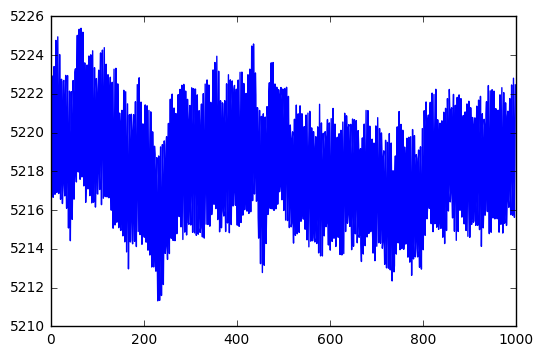

In [31]:
p300 = erp_mean.mean(axis=1)
plt.plot(p300)

In [32]:
def butter_lowpass_filter(data, cutoff, fs=1., order=1, axis=0, analog=False):
    # todo: add option to filtfilt or lfilter
    """
    Apply a digital Butterworth low-pass filter.
    :param data: array-like
    :param cutoff: Critical frequency, Hz
    :param fs: Sampling freqency, Hz
    :param order: Order of
    :param axis: ndarray axis, 0='long' axis, 1='row' axis
    :return:
    """
    nyquistFreqInRads = (2*np.pi*fs)/2
    Wn = 2*np.pi*cutoff / (nyquistFreqInRads)
    b, a = signal.butter(order, Wn, btype='low', analog=analog)
    y = signal.filtfilt(b, a, data, axis=axis)
    return y

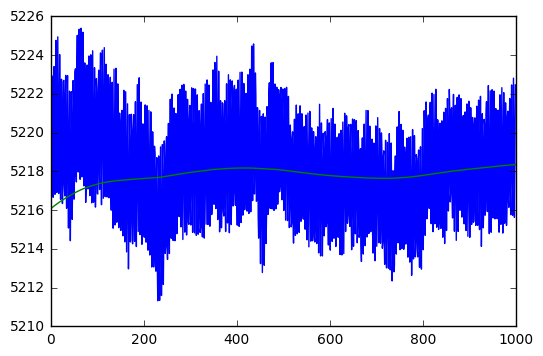

In [33]:
p300f = butter_lowpass_filter(p300, 0.25, 250)
plt.plot(p300)
plt.plot(p300f)

In [34]:
p300_detrend = p300-p300f

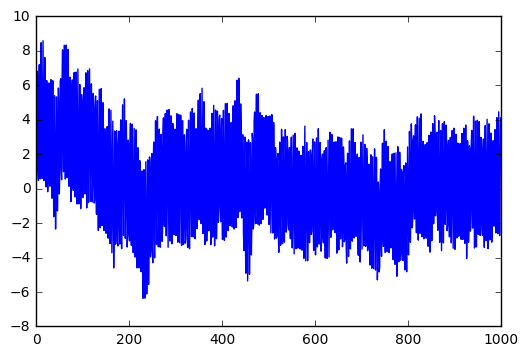

In [35]:
plt.plot(p300_detrend)

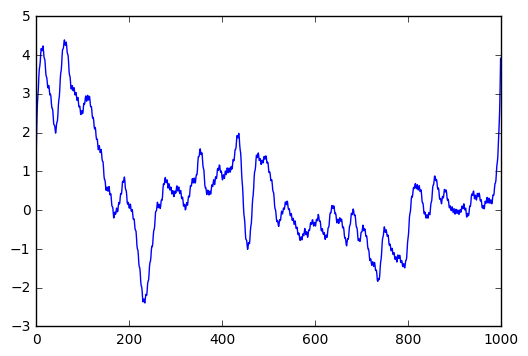

In [36]:
plt.plot(butter_lowpass_filter(p300_detrend, 10, 250))

In [37]:
meta_p3s = meta_frame.mean(axis=0)

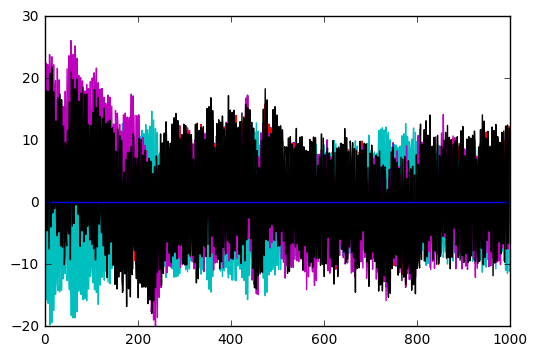

In [38]:
meta_detrend = meta_p3s - butter_lowpass_filter(meta_p3s, .25, 250, axis=0)
plt.plot(meta_detrend)

In [39]:
meta_detrend[:,3] *= -1

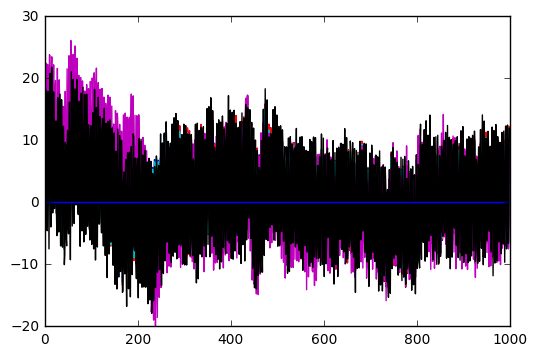

In [40]:
plt.plot(meta_detrend)

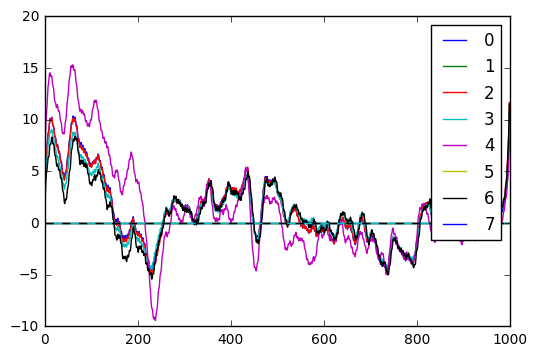

In [41]:
plt.plot(butter_lowpass_filter(meta_detrend, 10, 250))
chan=7
plt.plot(butter_lowpass_filter(meta_detrend[:,chan], 10, 250), 'c')
plt.plot(butter_lowpass_filter(meta_detrend[:,chan], 10, 250), 'k--')
plt.legend(range(8))

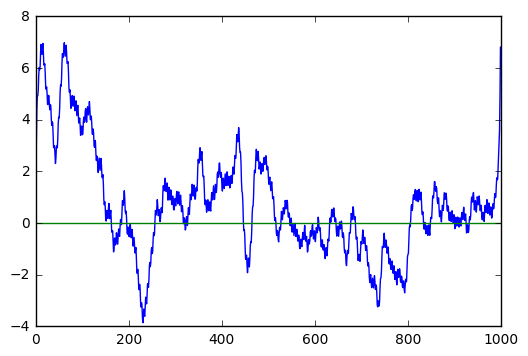

In [42]:
plt.plot(butter_lowpass_filter(meta_detrend.mean(axis=1), 15, 250))
plt.plot(meta_detrend[:,0]*0)